## Plot Performance vs pattern length for all connectomes

In [43]:
%load_ext autoreload
%autoreload 2
from imports_paper_plots import *
set_context_and_font()
set_context_and_font()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
task_name = "memory-sequence"
neuron_density = 1
results_dir_path = Path(os.environ["DATAICNS"])/"bioRNN"/f"{task_name}"
figs_path = Path(os.environ["DATAICNS"])/"bioRNN" /f"{task_name}/figs"
results_evalution_path = results_dir_path/"evaluation"/ f"neuron-density-{neuron_density}"/ "all"

In [17]:
results = pd.read_csv(results_evalution_path)
results.head(3)

,connectome,rand_partition,neuron_density,W,activation_out,bias,input_scaling,n_transient,pattern_length,spectral_radius,r2
0,macaque,True,1,bio_rank,CPUDispatcher(<function relu at 0x7ff686ae0160>),1,0.00001,100,5,0.99,0.999979
1,macaque,True,1,bio_norank,CPUDispatcher(<function relu at 0x7ff686ae0160>),1,0.00001,100,5,0.99,1.000000
2,macaque,True,1,rnd_density,CPUDispatcher(<function relu at 0x7ff686ae0160>),1,0.00001,100,5,0.99,0.999998


In [18]:
(results.connectome.unique(),
results.rand_partition.unique(),
results.input_scaling.unique(),
results.pattern_length.unique(),)

(array(['macaque', 'marmoset', 'human'], dtype=object),
 array([ True, False]),
 array([1.e-05]),
 array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29]))

In [19]:
results = results.drop(columns=["activation_out", "n_transient"])
results.head(3)

,connectome,rand_partition,neuron_density,W,bias,input_scaling,pattern_length,spectral_radius,r2
0,macaque,True,1,bio_rank,1,0.00001,5,0.99,0.999979
1,macaque,True,1,bio_norank,1,0.00001,5,0.99,1.000000
2,macaque,True,1,rnd_density,1,0.00001,5,0.99,0.999998


In [20]:
results = results.reindex(
    columns=['connectome', 'rand_partition', 'neuron_density', 
             'W', 'input_scaling', 'spectral_radius', 'pattern_length', 'r2']
)
results.head(3)

,connectome,rand_partition,neuron_density,W,input_scaling,spectral_radius,pattern_length,r2
0,macaque,True,1,bio_rank,0.00001,0.99,5,0.999979
1,macaque,True,1,bio_norank,0.00001,0.99,5,1.000000
2,macaque,True,1,rnd_density,0.00001,0.99,5,0.999998


In [21]:
results.W.unique(), results.input_scaling.unique(), results.pattern_length.unique(), type(results.rand_partition.unique()[0])

(array(['bio_rank', 'bio_norank', 'rnd_density', 'rnd_k', 'rnd_full'],
       dtype=object),
 array([1.e-05]),
 array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29]),
 numpy.bool_)

In [22]:
results = refactor_names(df=results,)

In [25]:
data.shape

(63000, 8)

In [26]:
data.head(3)

,connectome,rand_partition,neuron_density,W,input_scaling,spectral_radius,pattern_length,r2
0,Macaque,True,1,Bio (rank),0.00001,0.99,5,0.999979
1,Macaque,True,1,Bio (no-rank),0.00001,0.99,5,1.000000
2,Macaque,True,1,Random (density),0.00001,0.99,5,0.999998


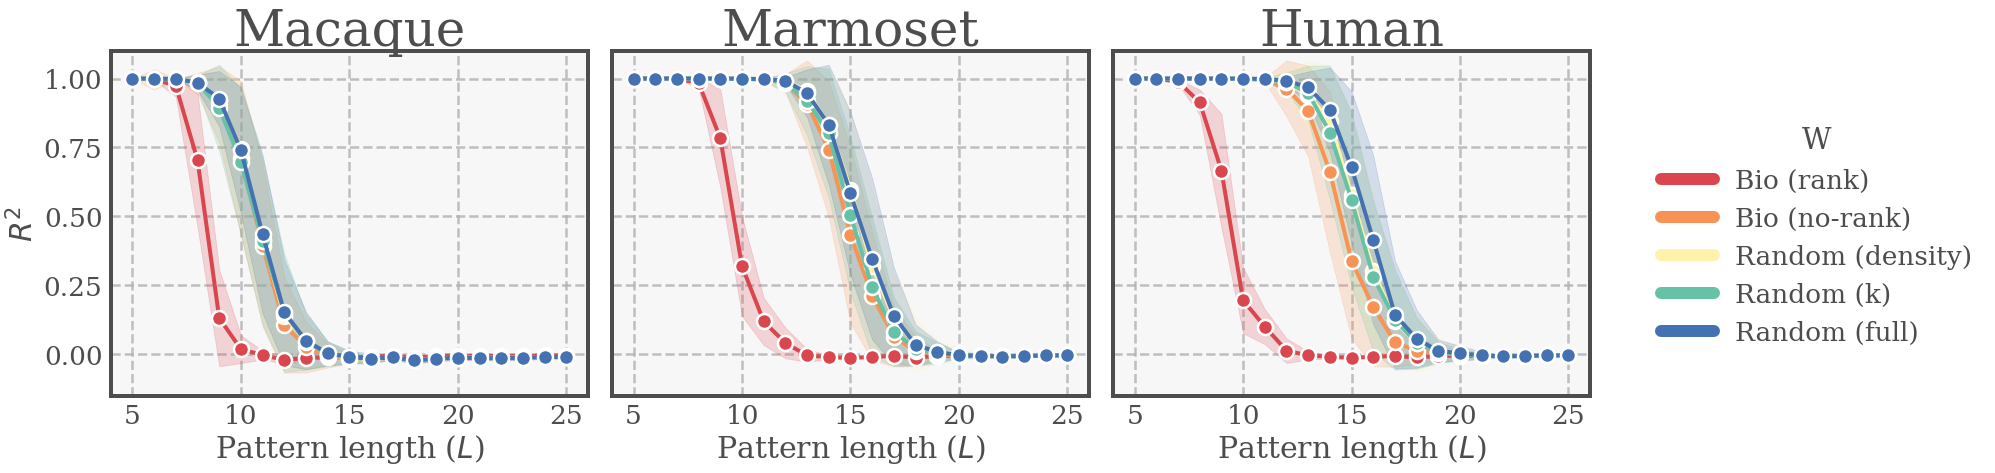

In [44]:
data = results[results.pattern_length < 26]

g = sns.relplot(
    data=data,
    x="pattern_length",
    y="r2",
    kind="line",    
    col="connectome",
    #row="rand_partition",
    hue="W",
    height=6.5,
    aspect=1.18,
    palette=my_palette,
    ci="sd",
    facet_kws={
        "margin_titles":True,
        "legend_out": True,        
        "ylim": (-.15, 1.1),
    },
    linewidth=4, 
    style="W",
    dashes=False,
    markers=["o"]*len(data.W.unique()),
    #markeredgecolor="white",
    markersize=15,
    markeredgewidth=2.5,
    #markerfacecolor="white",
#    style="W", #linestyle
)

g.set_axis_labels(y_var=r"$R^{2}$", x_var=r"Pattern length ($L$)")
g.set_xlabels(fontsize=30)
g.set_ylabels(fontsize=30)
g.fig.subplots_adjust(wspace=0.05,)
set_facetgrid_titles(g, col_template='{col_name}',size=50,)#row_template="{row_name}", 
plt.setp(g._legend.get_lines(), linewidth=12)
tweak_axes(g.axes, grid_color="#b0b0b0")
sns.despine(right=False, top=False)

plt.savefig(figs_path / "evaluation" / f"neuron-density-{neuron_density}"/ "r2_vs_pattlen_connectomes.svg")
#g.savefig(figs_path / "evaluation" / f"neuron-density-{neuron_density}"/ "r2_vs_pattlen_connectomes.png")
#g._legend.set_bbox_to_anchor((.47, .1, .45, .75))  # not using it
#plt.close()

In [42]:
data.groupby(["W", "rand_partition", "connectome", "pattern_length"]).count()

neuron_density  \
W             rand_partition connectome pattern_length                   
Bio (no-rank) False          Human      5                          100   
                                        6                          100   
                                        7                          100   
                                        8                          100   
                                        9                          100   
...                                                                ...   
Random (k)    True           Marmoset   21                         100   
                                        22                         100   
                                        23                         100   
                                        24                         100   
                                        25                         100   

                                                        input_scaling  \
W             rand_partition connectome pattern_length                  
Bio (no-rank) False          Human      5                         100   
                                        6                         100   
                                        7                         100   
                                        8                         100   
                                        9                         100   
...                                                               ...   
Random (k)    True           Marmoset   21                        100   
                                        22                        100   
                                        23                        100   
                                        24                        100   
                                        25                        100   

                                                        spectral_radius   r2  
W             rand_partition connectome pattern_length                        
Bio (no-rank) False          Human      5                           100  100  
                                        6                           100  100  
                                        7                           100  100  
                                        8                           100  100  
                                        9                           100  100  
...                                                                 ...  ...  
Random (k)    True           Marmoset   21                          100  100  
                                        22                          100  100  
                                        23                          100  100  
                                        24                          100  100  
                                        25                          100  100  

[630 rows x 4 columns]